In [31]:
import scipy.io
import pandas as pd
import numpy as np

data = scipy.io.loadmat("D:\Downloads\Spectrum-Sensing-master\Spectrum-Sensing-master\Datasets\dataset1.mat")

Pd_rawData = data['Pd_rawData']
column_data = Pd_rawData[:, 0]  # Extract the first column

df = pd.DataFrame(column_data, columns=['Signal']) 

# Step 4: Save the DataFrame to a CSV file
csv_file = 'output.csv'  # Desired output CSV file path
df.to_csv(csv_file, index=False)

print(f"Column data saved to {csv_file}")
df

Column data saved to output.csv


,Signal
0,-63.462112
1,-51.572655
2,-51.499149
3,-58.035061
4,-49.430534
...,...
9995,-50.682529
9996,-51.845894
9997,-46.487381
9998,-68.844406


In [32]:
df.head(10)

,Signal
0,-63.462112
1,-51.572655
2,-51.499149
3,-58.035061
4,-49.430534
5,-54.888130
6,-53.410915
7,-50.752907
8,-46.025627
9,-50.410847


In [33]:
dt = pd.read_csv('output.csv')
dt_np=dt.to_numpy()
data_corrected = dt_np.reshape(10000, 1)
df = pd.DataFrame(data_corrected, columns=['Column1'])

print(df.shape)  # Should output (10000, 1)
print(df.head())
dataa = (df - np.mean(df)) / np.sqrt(df.var(axis=0))
print(dataa.shape)  # Should output (10000, 1)
dataa.head(10)

(10000, 1)
     Column1
0 -63.462112
1 -51.572655
2 -51.499149
3 -58.035061
4 -49.430534
(10000, 1)


,Column1
0,-1.691297
1,0.439396
2,0.452569
3,-0.718723
4,0.823283
5,-0.154765
6,0.109964
7,0.586302
8,1.433472
9,0.647602


In [4]:
snr_dba = np.arange(-30,-1,1)
snr_dba

array([-30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18,
       -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,
        -4,  -3,  -2])

In [5]:
print(Pd_rawData)

[[-63.46211243 -55.84111404 -58.13018417 ... -48.16798401 -50.62502289
  -67.03105164]
 [-51.57265472 -49.82242966 -52.03461075 ... -54.51485443 -59.91072845
  -53.13423157]
 [-51.49914932 -50.84971237 -53.1775856  ... -49.83717728 -52.36620712
  -55.31245422]
 ...
 [-46.48738098 -48.01814651 -47.87374496 ... -52.07350159 -48.63124084
  -46.85354233]
 [-68.84440613 -57.77683258 -53.78637314 ... -49.44013214 -50.63199234
  -54.48200607]
 [-59.93075943 -67.64203644 -53.90647888 ... -51.33777237 -53.26446915
  -67.49798584]]


In [6]:
snr = 10**(np.array(snr_dba) / 10)
snr

array([0.001     , 0.00125893, 0.00158489, 0.00199526, 0.00251189,
       0.00316228, 0.00398107, 0.00501187, 0.00630957, 0.00794328,
       0.01      , 0.01258925, 0.01584893, 0.01995262, 0.02511886,
       0.03162278, 0.03981072, 0.05011872, 0.06309573, 0.07943282,
       0.1       , 0.12589254, 0.15848932, 0.19952623, 0.25118864,
       0.31622777, 0.39810717, 0.50118723, 0.63095734])

In [7]:
#Generating noise
from scipy.stats import gamma

def gg6(n, N, mu, beta, rho):
    """
    Generate N Generalized Gaussian m-dimensional vectors with means mu,
    inverse scales beta, and parameters rho.
    
    Parameters:
    n (int): Number of vectors
    N (int): Dimension of each vector
    mu (float or list of floats): Mean values
    beta (float or list of floats): Inverse scale parameters
    rho (float or list of floats): Shape parameters
    
    Returns:
    np.ndarray: n-by-N array of Generalized Gaussian vectors
    """
    if isinstance(mu, (int, float)):
        mu = np.full(n, mu)
    if isinstance(beta, (int, float)):
        beta = np.full(n, beta)
    if isinstance(rho, (int, float)):
        rho = np.full(n, rho)
    
    # Initialize the output array
    x = np.zeros((n, N))
    
    # Generate the Generalized Gaussian vectors
    for i in range(n):
        gamma_samples = gamma.rvs(1 / rho[i], scale=1, size=N)
        generalized_gaussian = (gamma_samples ** (1 / rho[i])) * (np.random.rand(N) < 0.5) * 2 - 1
        x[i, :] = mu[i] + (1 / np.sqrt(beta[i])) * generalized_gaussian
    
    return x

# Example usage:
n = 5
N = 10
mu = 0
beta = 1
rho = 2
result = gg6(n, N, mu, beta, rho)
print(result)


[[-1.         -1.          0.22491288 -0.98627905 -1.          0.03790996
  -1.          0.34032791 -1.         -0.85940799]
 [-0.05138698  0.80490149 -0.82098678 -1.         -0.61118388 -1.
  -0.49285052 -0.99186407 -1.         -1.        ]
 [ 0.31206392 -0.73296091 -1.         -1.         -1.         -0.51611017
   1.8626362   0.40061345 -0.98898084 -0.19911472]
 [-1.          0.2443166   0.36997852  0.2345555  -0.24288017  0.85039692
  -1.          0.32618515 -0.74379612  0.12211971]
 [ 0.30134391 -0.68349362 -1.         -0.19596618 -1.          0.83016636
  -1.         -0.02168462 -0.11981586 -1.        ]]


In [8]:
from scipy.special import gamma as gamma_function

def ggnoise(m, n, var, beta):
    beta1 = gamma_function(3 / beta) / (var * gamma_function(1 / beta))
    y = gg6(m, n, 0, beta1, beta)
    return y

In [9]:
#Finding Differential Enthalphy for the signals for given value of beta

def find_de(signal, beta):
    # Calculate the mean of the signal
    signal_mean = np.mean(signal)
    
    # Calculate the alpha value
    alpha = np.log(beta * (np.sum(np.abs(signal - signal_mean) ** beta)) / len(signal)) / beta
    
    # Calculate the DE value
    de = 1 / beta - np.log(beta / (2 * gamma_function(1 / beta))) + alpha
    
    return de

In [10]:
#Preprocessing of the data where the calculated differential Entropy is compared with the reference gamma and the normalised dataset is created

from sklearn.preprocessing import scale
def preprocessing_de(df, snr_dba, beta):
    # Preprocessing raw data
    dataa = (df - np.mean(df)) / np.sqrt(df.var(axis=0))
    dataa = dataa.values.flatten() 
    
    # Calculating SNR
    snr = 10 ** (snr_dba / 10)
    
    # Length of data
    N = len(dataa)
    
    # Number of iterations
    M = 25000
    
    # Initialize data_set
    data_set = np.zeros((2 * M, 2))
    
    # Generate observations
    for i in range(M):
        
        # Generate noise under H0
        noise = ggnoise(1, N, 1, beta)
        
        # Generate signal under H1
        signal = np.sqrt(snr) * dataa + noise
        
        # Calculate observations under both hypotheses
        obs_H0 = find_de(noise, beta)
        obs_H1 = find_de(signal, beta)
        
        # Assign observations and labels to data_set
        data_set[i, 0] = obs_H0
        data_set[i + M, 0] = obs_H1
        data_set[i, 1] = 0
        data_set[i + M, 1] = 1

    # Rescaling and shuffling the data
    col_data_set = scale(data_set[:, 0])
    data_set_temp = np.column_stack((col_data_set, data_set[:, 1]))
    np.random.shuffle(data_set_temp)
    
    return data_set_temp

Sl no. SNR: 1
[[-1.00740974  0.        ]
 [ 0.3872515   0.        ]
 [-0.67026224  0.        ]
 ...
 [-1.07602778  0.        ]
 [ 0.81967206  0.        ]
 [-2.11938108  0.        ]]
training


Sl no. SNR: 2
[[ 0.02735132  0.        ]
 [ 0.42763027  1.        ]
 [-1.09036449  0.        ]
 ...
 [-0.40151664  1.        ]
 [ 1.14060464  1.        ]
 [ 2.17356333  0.        ]]
training


Sl no. SNR: 3
[[-0.86413473  1.        ]
 [-1.34442892  0.        ]
 [ 0.94016693  0.        ]
 ...
 [-0.44192607  1.        ]
 [-1.83122053  0.        ]
 [-1.58594487  1.        ]]
training


Sl no. SNR: 4
[[-0.464772    0.        ]
 [-1.72291922  1.        ]
 [-0.00544931  1.        ]
 ...
 [-1.09087799  1.        ]
 [-1.49883304  0.        ]
 [ 0.64740463  0.        ]]
training


Sl no. SNR: 5
[[-0.47542886  1.        ]
 [-0.49664861  0.        ]
 [ 0.80368984  1.        ]
 ...
 [-0.0587997   1.        ]
 [ 0.12112709  1.        ]
 [-0.84575683  0.        ]]
training


Sl no. SNR: 6
[[-1.00944971  1.    

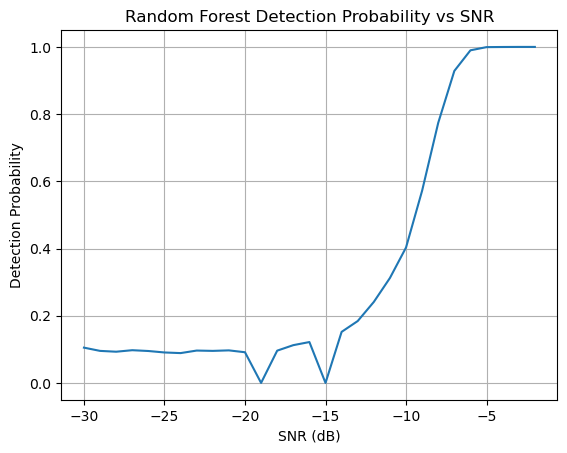

In [20]:
#Training the machine using Random Forest and plotting SNR vs Probability 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

beta = 1 #np.array([1, 2])

result_matrix = np.zeros(len(snr_dba))

for i in range(len(snr_dba)):
    print(f'Sl no. SNR: {i + 1}')

    data_set = preprocessing_de(df, snr_dba[i], beta)
    print(data_set)
        
    if data_set is not None:
        X = data_set[:, 0].reshape(-1, 1)
        Y = data_set[:, 1]

        print('training')
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
        
        model_randomforests = RandomForestClassifier(n_estimators=20)
        model_randomforests.fit(X_train, y_train)

        # Get the probabilities for the positive class (class 1)
        prob_positive_class = model_randomforests.predict_proba(X_test)[:, 1]

        fpr, tpr, thresholds = roc_curve(y_test, prob_positive_class, pos_label=1)
        roc_auc = auc(fpr, tpr)

        idx = np.where(fpr <= 0.1)[0]
        if len(idx) > 0: 
            result_matrix[i] = tpr[idx[-1]]
        else:
            result_matrix[i] = 0

    print('\n')

print("Result Matrix:\n", result_matrix)

# Plotting
plt.plot(snr_dba, result_matrix)
plt.xlabel('SNR (dB)')
plt.ylabel('Detection Probability')
plt.title('Random Forest Detection Probability vs SNR')
plt.grid(True)
plt.show()


Sl no. SNR: 1
[[-0.60024196  0.        ]
 [ 0.28082123  1.        ]
 [ 0.34920659  1.        ]
 ...
 [ 0.01385892  1.        ]
 [-0.96803956  0.        ]
 [-2.07644619  0.        ]]
training


Sl no. SNR: 2
[[-1.19726176  0.        ]
 [ 0.96379354  1.        ]
 [ 2.44463273  0.        ]
 ...
 [-0.16642952  1.        ]
 [ 2.87546964  0.        ]
 [ 0.66545678  1.        ]]
training


Sl no. SNR: 3
[[-1.61241615  0.        ]
 [-0.68047839  0.        ]
 [-2.17359174  0.        ]
 ...
 [-0.33840442  1.        ]
 [-0.25803356  1.        ]
 [ 0.20035185  0.        ]]
training


Sl no. SNR: 4
[[-1.25152696  0.        ]
 [ 0.5362663   1.        ]
 [-0.24200948  1.        ]
 ...
 [ 2.04355079  0.        ]
 [ 0.40781241  0.        ]
 [-0.76470275  0.        ]]
training


Sl no. SNR: 5
[[ 0.89542777  0.        ]
 [-0.89853891  1.        ]
 [-0.13266059  1.        ]
 ...
 [-0.49164749  1.        ]
 [ 0.92295353  1.        ]
 [-1.20377216  0.        ]]
training


Sl no. SNR: 6
[[ 1.22304652  1.    

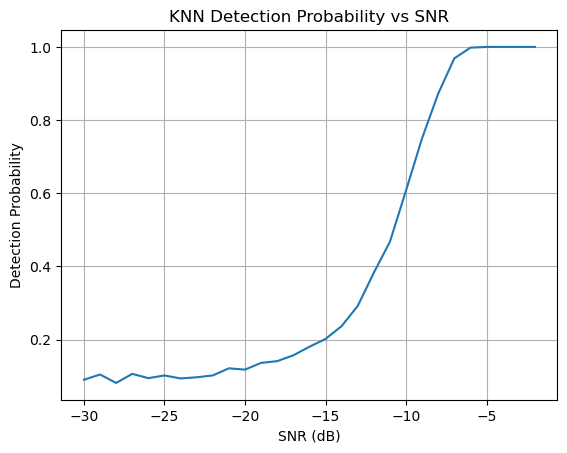

In [11]:
#Training the machine using KNN (K-nearest Neighbors) and plotting SNR vs Probability 
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

beta = 1

pd_knn_de = np.zeros(len(snr_dba))

for i in range(len(snr_dba)):
    print(f'Sl no. SNR: {i + 1}')

    data_set = preprocessing_de(df, snr_dba[i], beta)
    print(data_set)
        
    if data_set is not None:
        X = data_set[:, 0].reshape(-1, 1)
        Y = data_set[:, 1]

        print('training')
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
        
        model_knn = KNeighborsClassifier(n_neighbors=500)
        model_knn.fit(X_train, y_train)

        prob_positive_class = model_knn.predict_proba(X_test)[:, 1]

        fpr, tpr, thresholds = roc_curve(y_test, prob_positive_class, pos_label=1)
        roc_auc = auc(fpr, tpr)

        idx = np.where(fpr <= 0.1)[0]
        if len(idx) > 0: 
            pd_knn_de[i] = tpr[idx[-1]]
        else:
            pd_knn_de[i] = 0

    print('\n')

print("Result Matrix:\n", pd_knn_de)

# Plotting
plt.plot(snr_dba, pd_knn_de)
plt.xlabel('SNR (dB)')
plt.ylabel('Detection Probability')
plt.title('KNN Detection Probability vs SNR')
# plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.grid(True)
plt.show()


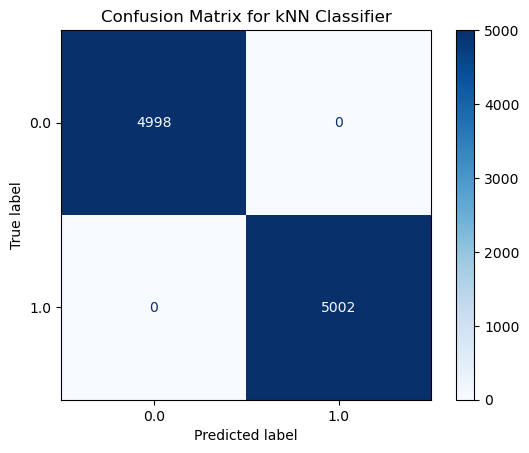

In [21]:
from sklearn import metrics
Y_pred = model_knn.predict(X_test)

# Create the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, Y_pred)

# Plot the confusion matrix
#cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model_knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for kNN Classifier')
plt.show()
#cm_display.plot()
#plt.show()

In [28]:
from sklearn import metrics
Y_pred_rf =  model_randomforests.predict(X_test)

# Create the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, Y_pred_rf)

# Plot the confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=model_randomforest.classes_)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# Calculate and print additional classification metrics
#print("Classification Report:")
#print(classification_report(y_test, Y_pred_rf)

TypeError: 'numpy.ndarray' object is not callable

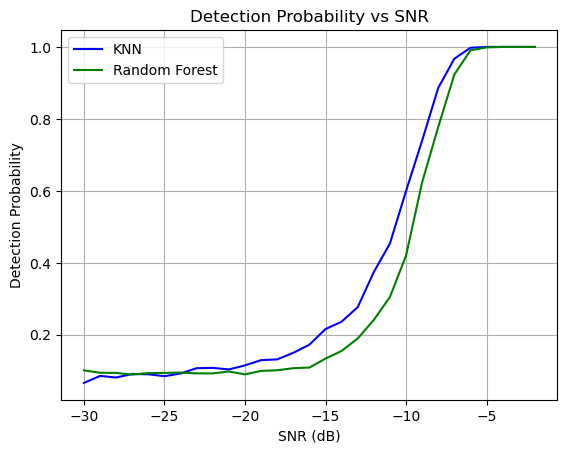

In [22]:
plt.plot(snr_dba, pd_knn_de, label='KNN', color='blue')
plt.plot(snr_dba, result_matrix, label='Random Forest', color='green')
plt.xlabel('SNR (dB)')
plt.ylabel('Detection Probability')
plt.title('Detection Probability vs SNR')
plt.legend()
plt.grid(True)
plt.show()


Sl no. SNR: 1
training


Sl no. SNR: 2
training


Sl no. SNR: 3
training


Sl no. SNR: 4
training


Sl no. SNR: 5
training


Sl no. SNR: 6
training


Sl no. SNR: 7
training


Sl no. SNR: 8
training


Sl no. SNR: 9
training


Sl no. SNR: 10
training


Sl no. SNR: 11
training


Sl no. SNR: 12
training


Sl no. SNR: 13
training


Sl no. SNR: 14
training


Sl no. SNR: 15
training


Sl no. SNR: 16
training


Sl no. SNR: 17
training


Sl no. SNR: 18
training


Sl no. SNR: 19
training


Sl no. SNR: 20
training


Sl no. SNR: 21
training


Sl no. SNR: 22
training


Sl no. SNR: 23
training


Sl no. SNR: 24
training


Sl no. SNR: 25
training


Sl no. SNR: 26
training


Sl no. SNR: 27
training


Sl no. SNR: 28
training


Sl no. SNR: 29
training


Detection Probability (pd_lr_de):
 [0.09919893 0.10583699 0.09810464 0.10190743 0.11423974 0.11145263
 0.10279507 0.11127616 0.11918682 0.11922923 0.12711291 0.13859275
 0.15476671 0.17574622 0.18375607 0.21226165 0.26286249 0.31637286
 0.38989218 0.48668

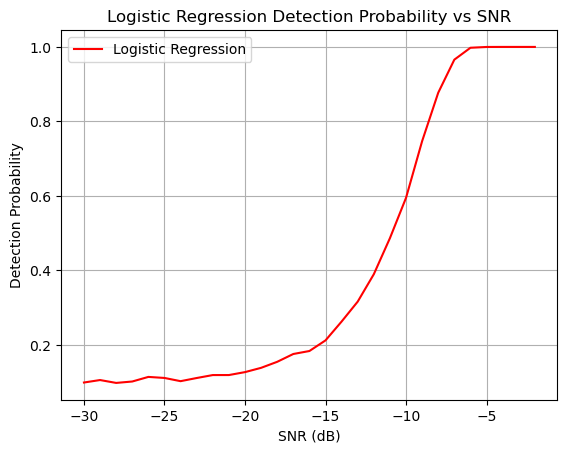

In [16]:
#Training the machine using Logistic Regression and plotting SNR vs Probability 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

pd_lr_de = np.ones(len(snr_dba))

for i in range(len(snr_dba)):
    print(f'Sl no. SNR: {i + 1}')
    data_set = preprocessing_de(df, snr_dba[i], beta)
    
    if data_set is not None:  
        X = data_set[:, 0].reshape(-1, 1)
        Y = data_set[:, 1]

        # Split the data into training and testing sets
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

        print('training')
        model_lr = LogisticRegression()
        model_lr.fit(X_train, Y_train)

        score_log = model_lr.predict_proba(X_test)[:, 1]

        fpr, tpr, thresholds = roc_curve(Y_test, score_log, pos_label=1)

        idx = np.where(fpr <= 0.1)[0]
        if len(idx) > 0:
            pd_lr_de[i] = tpr[idx[-1]]
        else:
            pd_lr_de[i] = 0

    print('\n')

print("Detection Probability (pd_lr_de):\n", pd_lr_de)

# Plotting Logistic Regression results
plt.plot(snr_dba, pd_lr_de, label='Logistic Regression', color='red')
plt.xlabel('SNR (dB)')
plt.ylabel('Detection Probability')
plt.title('Logistic Regression Detection Probability vs SNR')
plt.legend()
plt.grid(True)
plt.show()


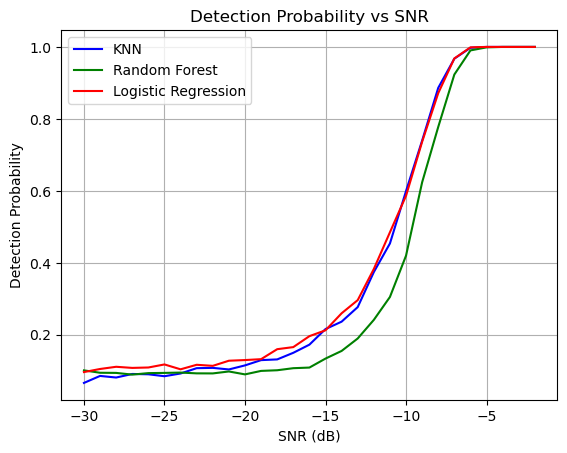

In [31]:
plt.plot(snr_dba, pd_knn_de, label='KNN', color='blue')
plt.plot(snr_dba, result_matrix, label='Random Forest', color='green')
plt.plot(snr_dba, pd_lr_de, label='Logistic Regression', color='red')
plt.xlabel('SNR (dB)')
plt.ylabel('Detection Probability')
plt.title('Detection Probability vs SNR')
plt.legend()
plt.grid(True)
plt.show()

Sl no. SNR: 1


Sl no. SNR: 2


Sl no. SNR: 3


Sl no. SNR: 4


Sl no. SNR: 5


Sl no. SNR: 6


Sl no. SNR: 7


Sl no. SNR: 8


Sl no. SNR: 9


Sl no. SNR: 10


Sl no. SNR: 11


Sl no. SNR: 12


Sl no. SNR: 13


Sl no. SNR: 14


Sl no. SNR: 15


Sl no. SNR: 16


Sl no. SNR: 17


Sl no. SNR: 18


Sl no. SNR: 19


Sl no. SNR: 20


Sl no. SNR: 21


Sl no. SNR: 22


Sl no. SNR: 23


Sl no. SNR: 24


Sl no. SNR: 25


Sl no. SNR: 26


Sl no. SNR: 27


Sl no. SNR: 28


Sl no. SNR: 29




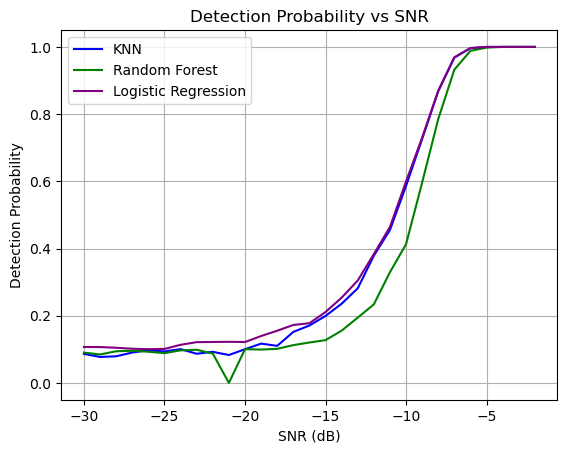

In [9]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assume preprocessing_de function is defined previously as per your earlier codes
# Example raw_data and snr_dba values, replace these with actual values
# raw_data = np.random.rand(1000)
# snr_dba = np.array([-22, -15, -10])  # Example SNR values, replace with actual values
beta = 1  # Example beta value, replace with actual value

# Initialize result arrays
pd_knn_dee = np.ones(len(snr_dba))
pd_rf_dee = np.ones(len(snr_dba))
pd_lr_dee = np.ones(len(snr_dba))

# Define model training and evaluation function
def train_and_evaluate(model, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)
    score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, score, pos_label=1)
    idx = np.where(fpr <= 0.1)[0]
    return tpr[idx[-1]] if len(idx) > 0 else 0

for i in range(len(snr_dba)):
    print(f'Sl no. SNR: {i + 1}')
    data_set = preprocessing_de(df, snr_dba[i], beta)
    
    if data_set is not None:  # Ensure data_set is valid
        X = data_set[:, 0].reshape(-1, 1)
        Y = data_set[:, 1]

        # Split the data into training and testing sets
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

        # KNN
        model_knn = KNeighborsClassifier(n_neighbors=100)
        pd_knn_dee[i] = train_and_evaluate(model_knn, X_train, Y_train, X_test, Y_test)
        
        # Random Forest
        model_rf = RandomForestClassifier(n_estimators=20)
        pd_rf_dee[i] = train_and_evaluate(model_rf, X_train, Y_train, X_test, Y_test)
        
        # Logistic Regression
        model_lr = LogisticRegression()
        pd_lr_dee[i] = train_and_evaluate(model_lr, X_train, Y_train, X_test, Y_test)

    print('\n')

# Plotting
plt.plot(snr_dba, pd_knn_dee, label='KNN', color='blue')
plt.plot(snr_dba, pd_rf_dee, label='Random Forest', color='green')
plt.plot(snr_dba, pd_lr_dee, label='Logistic Regression', color='purple')
plt.xlabel('SNR (dB)')
plt.ylabel('Detection Probability')
plt.title('Detection Probability vs SNR')
plt.legend()
plt.grid(True)
plt.show()
